<a href="https://colab.research.google.com/github/dpanagop/data_analytics_examples/blob/master/Wholes_customers_clustering_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install umap-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [3]:
df = pd.read_csv('Wholesale customers data.csv')

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.iloc[:,2:].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


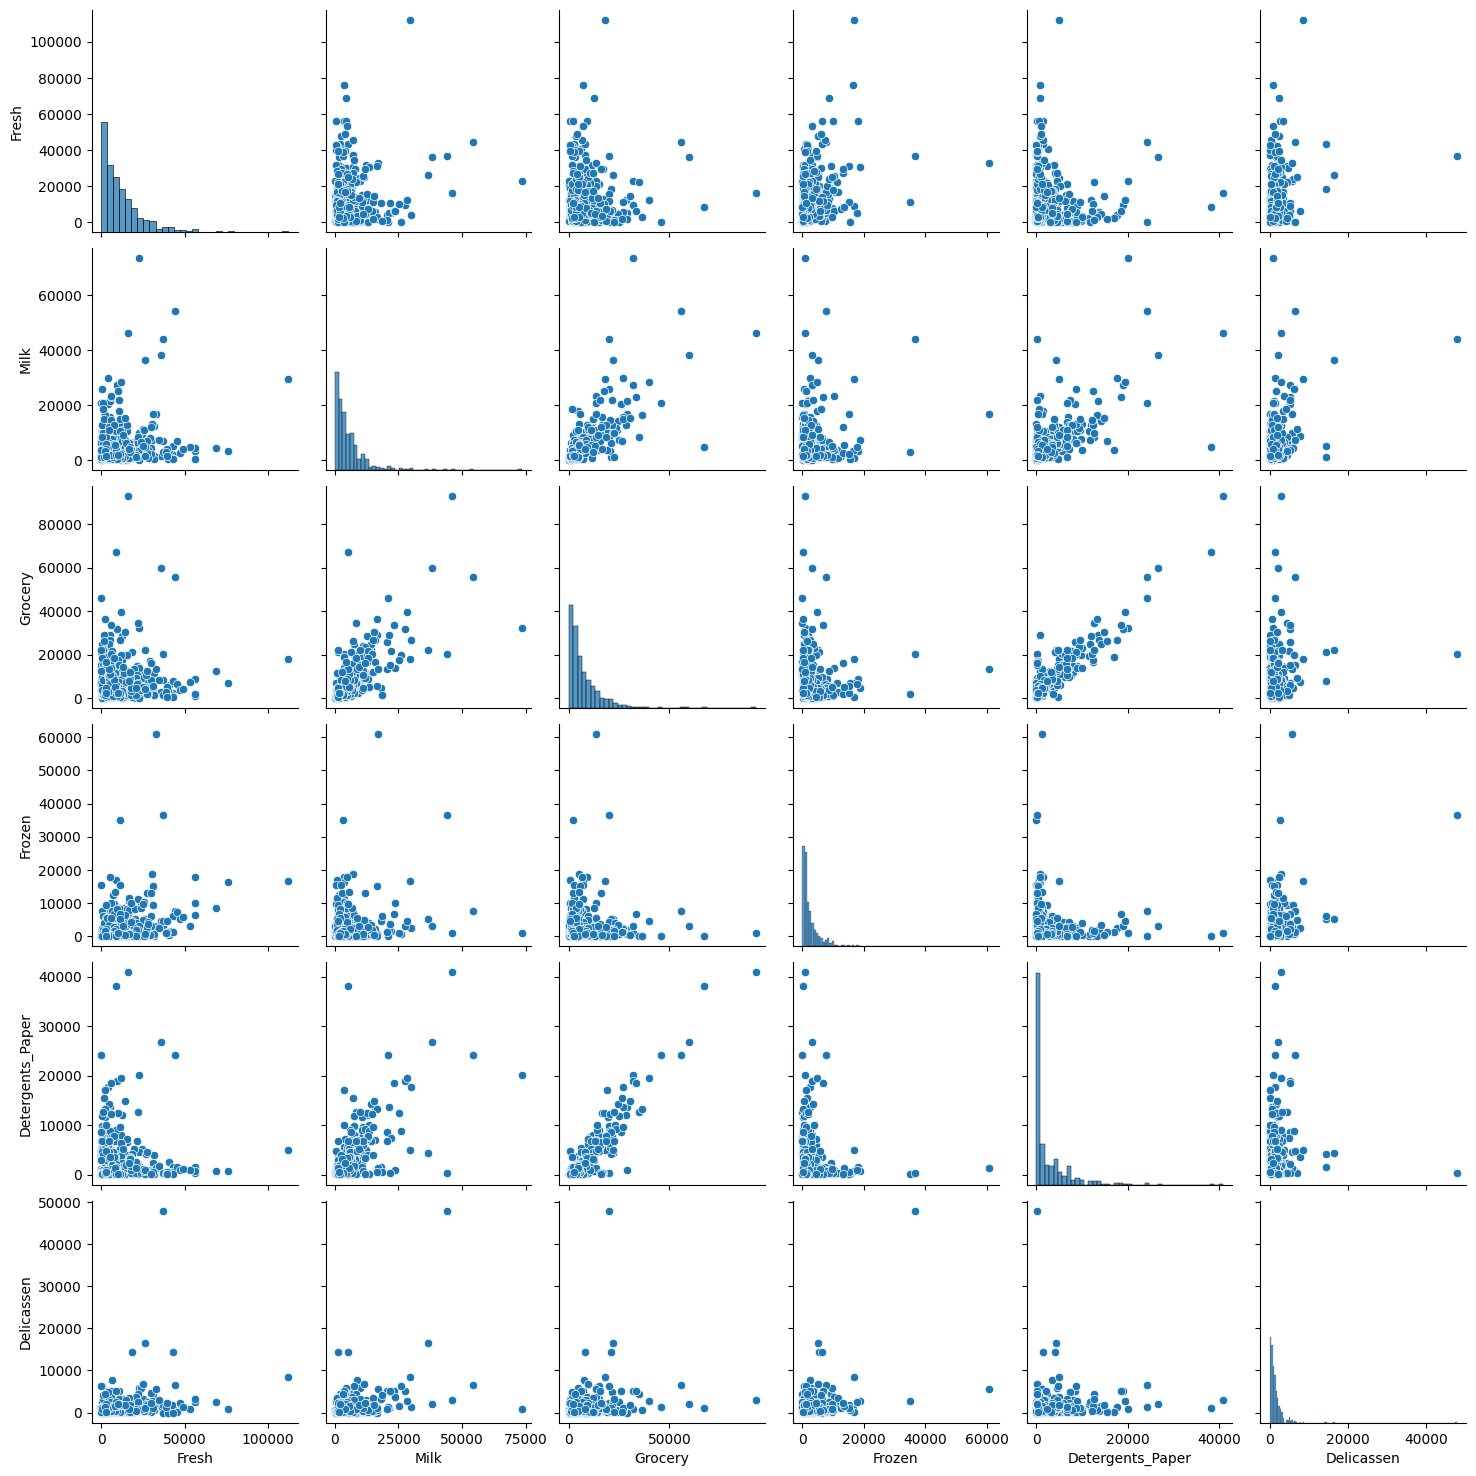

In [6]:
sns.pairplot(df.iloc[:,2:])

In [7]:
df.iloc[:,2:].corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [8]:
top_indexes_list = []
for col_name in df.iloc[:,2:].columns:
  q3 = df[col_name].quantile(q=0.75)
  col_max = df[col_name].max()
  threshold = q3+1.5*(q3-df[col_name].quantile(q=0.25))
  column_top_indexes = df.index[df[col_name]>threshold].tolist()
  size = len(column_top_indexes)
  print(f'for {col_name} Q3 is {q3}, max is {col_max}, threshold is {threshold}, found {size} instances')
  top_indexes_list = top_indexes_list+column_top_indexes

top_indexes_list = list(set(top_indexes_list))
print(f'found {len(top_indexes_list)} items in total')

for Fresh Q3 is 16933.75, max is 112151, threshold is 37642.75, found 20 instances
for Milk Q3 is 7190.25, max is 73498, threshold is 15676.125, found 28 instances
for Grocery Q3 is 10655.75, max is 92780, threshold is 23409.875, found 24 instances
for Frozen Q3 is 3554.25, max is 60869, threshold is 7772.25, found 43 instances
for Detergents_Paper Q3 is 3922.0, max is 40827, threshold is 9419.875, found 30 instances
for Delicassen Q3 is 1820.25, max is 47943, threshold is 3938.25, found 27 instances
found 108 items in total


In [9]:
top_indexes_list = []
for col_name in df.iloc[:,2:].columns:
  col_mean = df[col_name].mean()
  col_std = df[col_name].std()
  col_max = df[col_name].max()
  threshold = col_mean+3*col_std
  column_top_indexes = df.index[df[col_name]>threshold].tolist()
  size = len(column_top_indexes)
  print(f'for {col_name} Q3 is {q3}, max is {col_max}, threshold is {threshold}, found {size} instances')
  top_indexes_list = top_indexes_list+column_top_indexes

top_indexes_list = list(set(top_indexes_list))
print(f'found {len(top_indexes_list)} items in total')

for Fresh Q3 is 1820.25, max is 112151, threshold is 49942.2843225034, found 7 instances
for Milk Q3 is 1820.25, max is 73498, threshold is 27937.39743280343, found 9 instances
for Grocery Q3 is 1820.25, max is 92780, threshold is 36460.7657597103, found 7 instances
for Frozen Q3 is 1820.25, max is 60869, threshold is 17635.951815958913, found 6 instances
for Detergents_Paper Q3 is 1820.25, max is 40827, threshold is 17185.056525530785, found 10 instances
for Delicassen Q3 is 1820.25, max is 47943, threshold is 9985.188266653646, found 4 instances
found 26 items in total


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


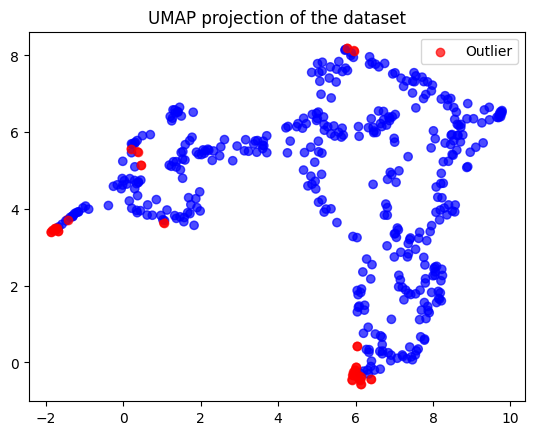

In [10]:
# Fit UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(df.iloc[:,2:])

# Colors for points
colors = np.array(['blue'] * len(df))
colors[top_indexes_list] = 'red'

# Create a scatter plot
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, alpha=0.7)
plt.title('UMAP projection of the dataset')

# Highlight outliers
for outlier in top_indexes_list:
    plt.scatter(embedding[outlier, 0], embedding[outlier, 1], c='red', label='Outlier', alpha=0.7)

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

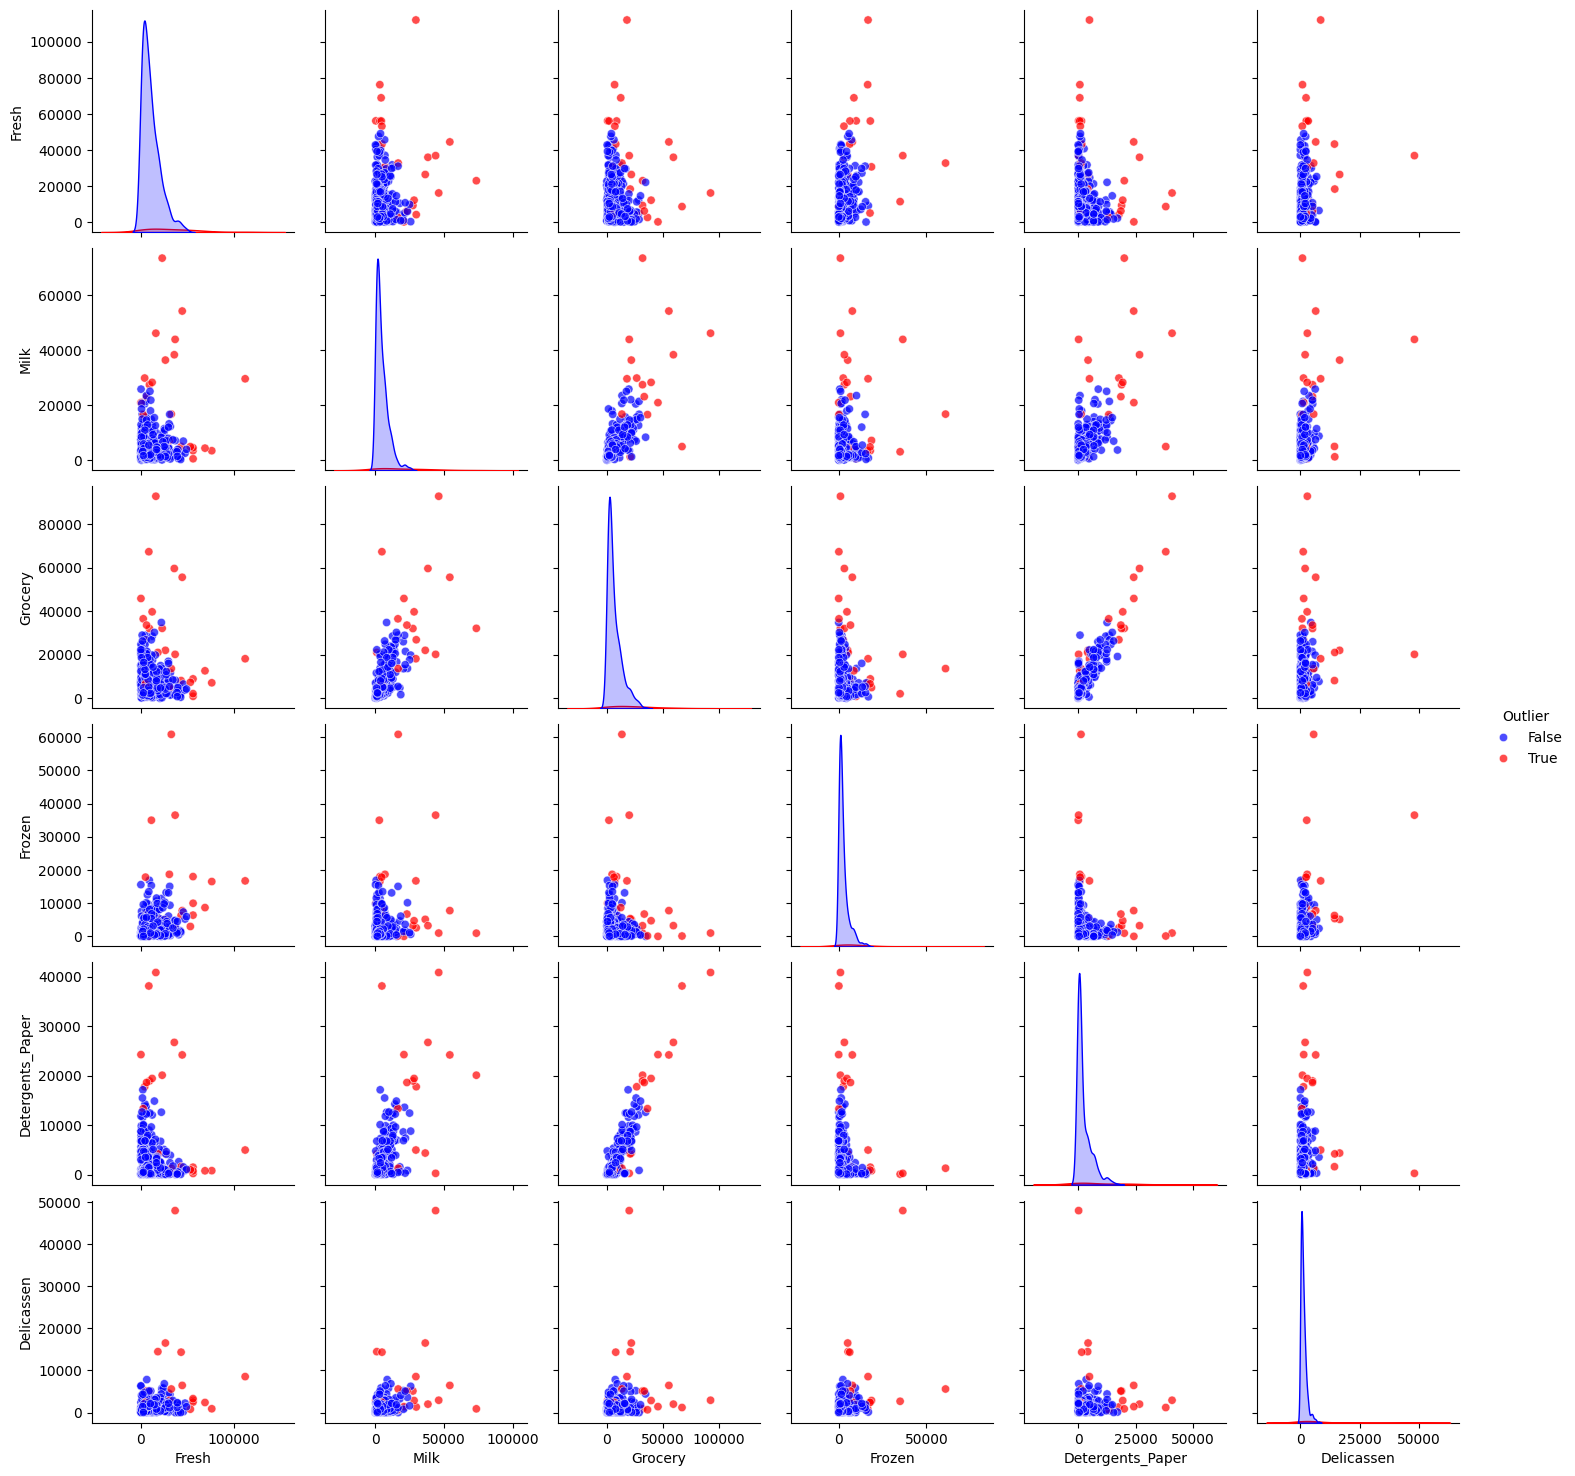

In [11]:
df['Outlier'] = False
df.loc[top_indexes_list,'Outlier'] = True

# Seaborn pairplot with hue set as "Outlier"
pairplot = sns.pairplot(df.iloc[:,2:], hue='Outlier', palette={False: 'blue', True: 'red'}, plot_kws={'alpha': 0.7})

# Show plot
plt.show()